<a href="https://colab.research.google.com/github/Kathyayani15/DataAnalysisWithPython/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


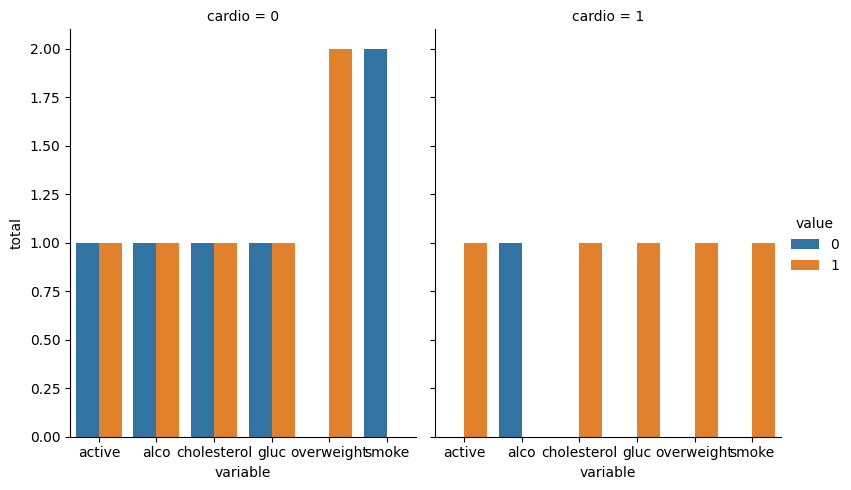

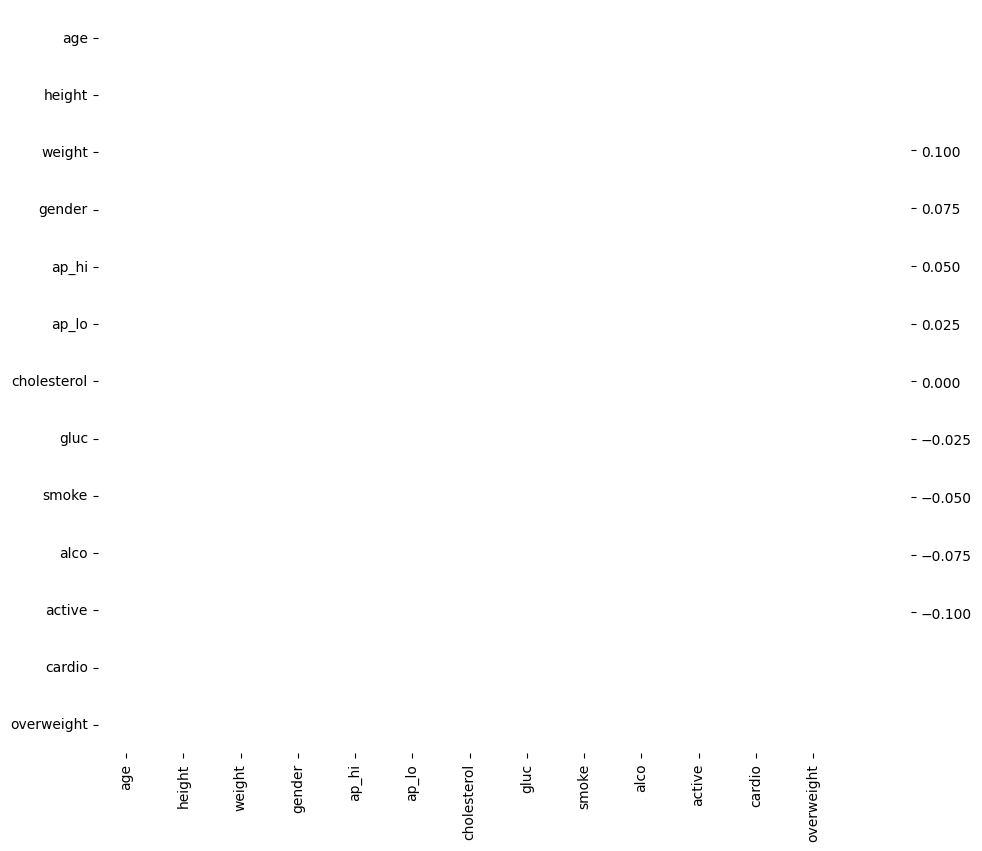

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Import data
df = pd.read_csv('medical_examination.csv')

# 2. Add 'overweight' column
df['overweight'] = df['Weight'] / (df['Height'] / 100) ** 2
df['overweight'] = (df['overweight'] > 25).astype(int)

# 3. Normalize data by making 0 always good and 1 always bad.
df['Cholesterol'] = (df['Cholesterol'] > 1).astype(int)
df['Glucose'] = (df['Glucose'] > 1).astype(int)

# Rename columns to match the instructions
df.columns = [
    'age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'
]

# 4. Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` with values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size()

    # Rename the 'size' column appropriately
    df_cat.rename(columns={'size': 'total'}, inplace=True)

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
        x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar', height=5, aspect=0.8
    ).fig

    return fig

# Generate the categorical plot
cat_plot_figure = draw_cat_plot()
cat_plot_figure.savefig('categorical_plot.png')

# 5. Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Draw the heatmap
    sns.heatmap(
        corr, mask=mask, annot=True, fmt=".1f", square=True, linewidths=0.5, center=0, cbar_kws={"shrink": 0.5}, ax=ax
    )

    return fig

# Generate the heatmap
heat_map_figure = draw_heat_map()
heat_map_figure.savefig('heatmap.png')
